# Neural Network for logical XOR Function

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [1]:
%tensorflow_version 1.14
%matplotlib inline
from IPython.display import SVG
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot

from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


## Create dataset for the logical XOR function

In [0]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the neural net model

In [0]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

6 parameters. There are 2 input nodes, connected to 2 hidden nodes. This gives 2x2 = 4 weights. This accounts for 4 of the parameters.

The other 2 parameters are the bias terms: one bias weight for each of the two hidden nodes.

## Add another layer

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

There are 3 new parameters (for a total of 9). The new layer contains a single node, so each of the 2 previous hidden-layer nodes are connected to this single new node. That gives 2 regular weights. In addition, the new single node has a single bias node, connected to it with 1 weight. Hence there are 3 new weights in the network.

## Visualize the model

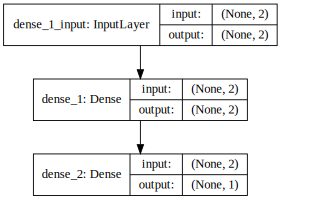

In [7]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

## Train the model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc. below as needed. The goal should be 100% accuracy for the XOR data.

In [9]:
model.fit(data_X, data_y,
          steps_per_epoch=500,
          epochs=20)   # Note: different random initial conditions require different # of epochs. The output results in acc 1.000

Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 0.6978 - acc: 0.4970
Epoch 2/20
500/500 [==============================] - 1s 1ms/step - loss: 0.6793 - acc: 0.5805
Epoch 3/20
500/500 [==============================] - 1s 1ms/step - loss: 0.6096 - acc: 0.8220
Epoch 4/20
500/500 [==============================] - 1s 1ms/step - loss: 0.4913 - acc: 1.0000
Epoch 5/20
500/500 [==============================] - 1s 1ms/step - loss: 0.3834 - acc: 1.0000
Epoch 6/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2997 - acc: 1.0000
Epoch 7/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2368 - acc: 1.0000
Epoch 8/20
500/500 [==============================] - 1s 1ms/step - loss: 0.1892 - acc: 1.0000
Epoch 9/20
500/500 [==============================] - 0s 998us/step - loss: 0.1528 - acc: 1.0000
Epoch 10/20
500/500 [==============================] - 1s 1ms/step - loss: 0.1245 - acc: 1.0000
Epoch 11/20
500/500 [==========================

# Run the trained model on the dataset.

In [10]:
model.predict(data_X)

array([[0.01934543],
       [0.9772504 ],
       [0.98447406],
       [0.01798293]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The model is close to the desire results given in data_y (see following cell). The results are not exact because we have a sigmoid activation and will never output exactly 1 or 0. But if we consider a threshold of 0.5, setting the output to 1 if above threshold and 0 otherwise, then indeed the output is exactly [0,1,1,0] for the 4 inputs, as expected. Thus the network has solved the XOR problem.

In [11]:
data_y

array([0, 1, 1, 0])

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [12]:
model.layers[0].get_weights()

[array([[-8.4953165, -7.9735317],
        [ 8.583813 ,  7.392084 ]], dtype=float32),
 array([ 4.4691157, -4.0118427], dtype=float32)]

In [13]:
model.layers[1].get_weights()

[array([[-8.071775],
        [ 8.60292 ]], dtype=float32), array([3.9016335], dtype=float32)]